## 📚 Section 3 Homework: COVID-19 Data Visualization

This notebook loads, cleans, and visualizes a COVID-19 dataset. We'll create three distinct plots to analyze the data and derive insights from them: a line plot to track trends, a bar chart to compare totals, and a scatter plot to explore relationships.

### 1. Setup and Data Loading

**Instructions:**
* Import the **pandas** and **matplotlib.pyplot** libraries.
* Load the dataset from the URL.
* Use `pd.to_datetime()` to convert the 'Date' column to the correct data type.
* Display the `.info()` and the first few rows (`.head()`) of the DataFrame to confirm it loaded correctly.

In [56]:
# Your code to import libraries and load the data here
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'

# Load the data into a DataFrame called 'df'
df = pd.read_csv(url)

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Display info and head of the DataFrame
print("DataFrame Information:\n")
df.info()
print("-"*50)
print("First 5 rows of the DataFrame:\n")
df.head()


DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
--------------------------------------------------
First 5 rows of the DataFrame:



,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [64]:
print(df['Date'].min())
print(df['Date'].max())

2020-01-22 00:00:00
2022-04-16 00:00:00


### 2. Line Plot: Confirmed Cases Over Time

**Instructions:**
* Choose a few countries (e.g., Malaysia, United States, India) to compare.
* Filter your DataFrame to only include data for these countries.
* Create a **line plot** showing the number of confirmed cases over time for each country.
* Add a title, axis labels, and a legend to make your plot clear and readable.

In [57]:
#list of countries in the dataset
print("Countries in the dataset:\n",df['Country'].unique())

Countries in the dataset:
 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland

###**How We Treat Palestine in the Dataset?**

#### **1. Global Comparisons**  
When comparing Palestine with other countries, we treat it as a **single country**.  
This is done by unifying the data labeled as ***Israel*** +***West Bank and Gaza*** = **Palestine**.  

This reflects our perspective that there is no such country as "Israel"; rather, **the whole land is Palestine.**  

---

#### **2. Internal / Special-Case Studies**  
When conducting a study focused only on Palestine (locally), it becomes useful to analyze the regions separately.  
In this case, we can break Palestine back down into its main components:  

- **West Bank** and **Gaza Strip**  
- **48 Land** (territories occupied since 1948, labeled as *Israel* in datasets)  

This approach allows us to capture regional differences inside Palestine, such as healthcare availability, mobility, infection rates, or other socioeconomic factors.  


In [58]:
# Create a new 'Palestine' by summing Israel + West Bank and Gaza
palestine_data = (
    df[df['Country'].isin(['Israel', 'West Bank and Gaza'])]
    .groupby('Date')[['Confirmed', 'Recovered', 'Deaths']]
    .sum()
    .reset_index()
)
palestine_data['Country'] = 'Palestine'

# Remove the original Israel and West Bank and Gaza from df
df = df[~df['Country'].isin(['Israel', 'West Bank and Gaza'])]

# Append the new Palestine data
df = pd.concat([df, palestine_data], ignore_index=True)

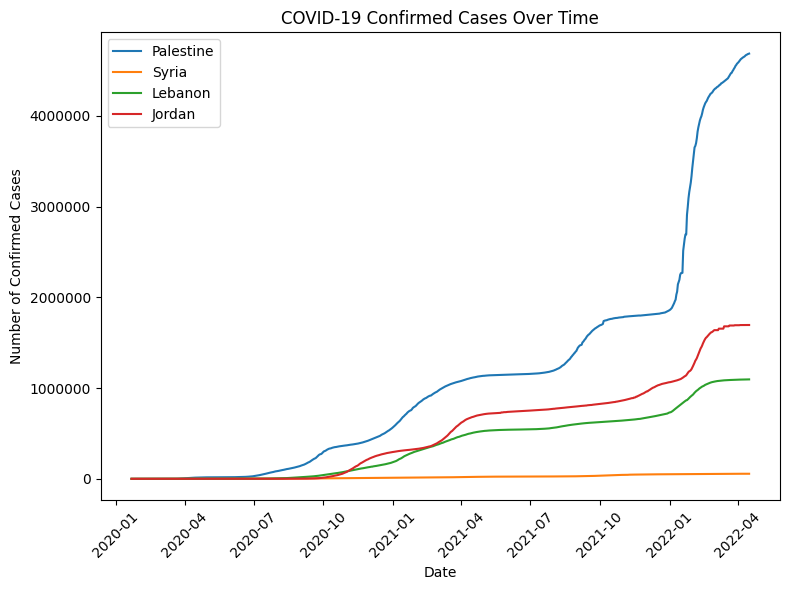

In [59]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Choose countries to compare "Levant"
countries = ['Palestine','Syria','Lebanon','Jordan']

# Filter the DataFrame for these countries
df_filtered = df[df['Country'].isin(countries)]

# Create the line plot
plt.figure(figsize=(8, 6))

for country in countries:
    country_data = df_filtered[df_filtered['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.xticks(rotation=45)

# Force y-axis to show exact numbers
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)

# Show the plot
plt.tight_layout()
plt.show()


### ✍️ Insights from the Line Plot

The `x-axis` shows `dates` from January 2020 to April 2022, and the `y-axis` shows `confirmed COVID-19 case`s for four Levant countries: **Palestine, Syria, Lebanon, and Jordan**. Cases were low initially, then increased significantly. **Syria** has the lowest spread, **Palestine** the highest, while **Jordan** and **Lebanon** show similar trends, matching in Feb–Mar 2021.

- Sharp increases indicate infection waves, especially in **Palestine at the beginning of 2022**.  
- Slower spread in Syria may reflect effective public health measures.  
- Jordan and Lebanon trends suggest similar outbreak patterns.  
- Overall, the line plot shows **uneven COVID-19 distribution across the Levant**.

### 3. Bar Chart: Comparing Totals

**Instructions:**
* From the full dataset, find the most recent cumulative total for 'Deaths' or 'Confirmed' cases for each country.
* Select the top 10 or 15 countries based on these totals.
* Create a **bar chart** to compare these countries.
* Make sure your chart has a title and clear labels. Rotate the x-axis labels if needed.

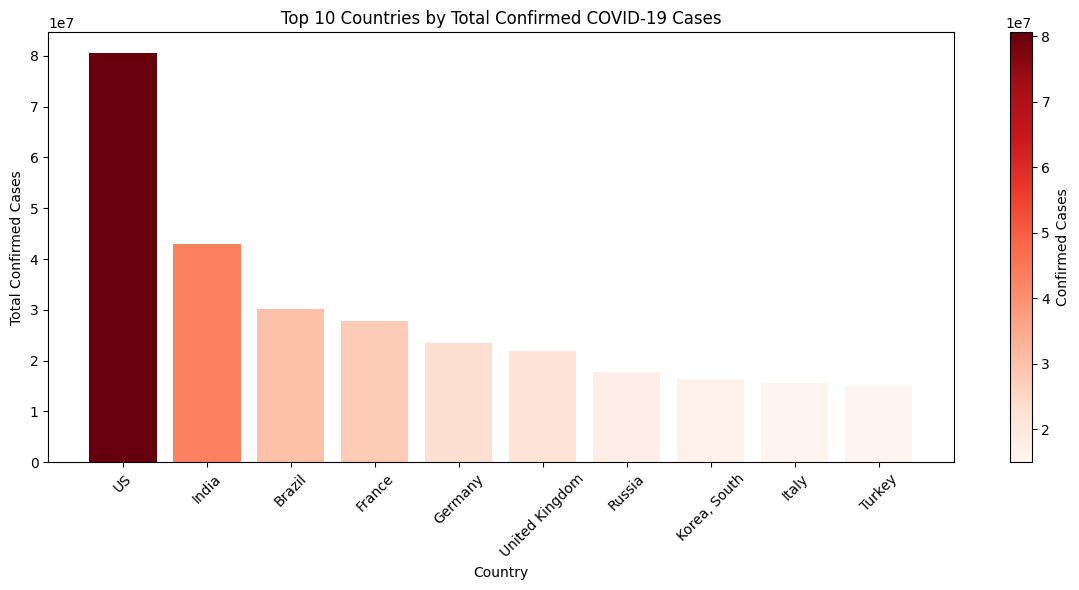

In [60]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Get the most recent data for each country
latest_data = df[df['Date'] == df['Date'].max()]

# Select top 10 countries by Confirmed cases
top_countries = latest_data.nlargest(10, 'Confirmed')

# Normalize the values for color mapping
norm = mcolors.Normalize(vmin=top_countries['Confirmed'].min(), vmax=top_countries['Confirmed'].max())
colors = cm.Reds(norm(top_countries['Confirmed']))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(top_countries['Country'], top_countries['Confirmed'], color=colors)

ax.set_title('Top 10 Countries by Total Confirmed COVID-19 Cases')
ax.set_xlabel('Country')
ax.set_ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)

# Add colorbar correctly
sm = cm.ScalarMappable(cmap='Reds', norm=norm)
sm.set_array(top_countries['Confirmed'])
fig.colorbar(sm, ax=ax, label='Confirmed Cases')

plt.tight_layout()
plt.show()


### ✍️ Insights from the Bar Chart

The bar chart shows the top ten countries with the highest confirmed COVID-19 cases from `January 2020` to `April 2022`. The **United States** has the highest number of cases, followed by **India**, with a noticeable gap between the top two countries. This may be due to factors such as population density, country size, and diversity, which could affect the ability to control the spread.  

After India, **Brazil** ranks third, and the remaining countries have relatively similar and lower numbers of confirmed cases.


### 4. Scatter Plot: Exploring Relationships

**Instructions:**
* Create a **scatter plot** to investigate the relationship between total 'Confirmed' cases and total 'Deaths' for all countries.
* Apply a **logarithmic scale** to both the x and y axes to better visualize the relationship across countries with vastly different numbers.
* Add a title and axis labels.

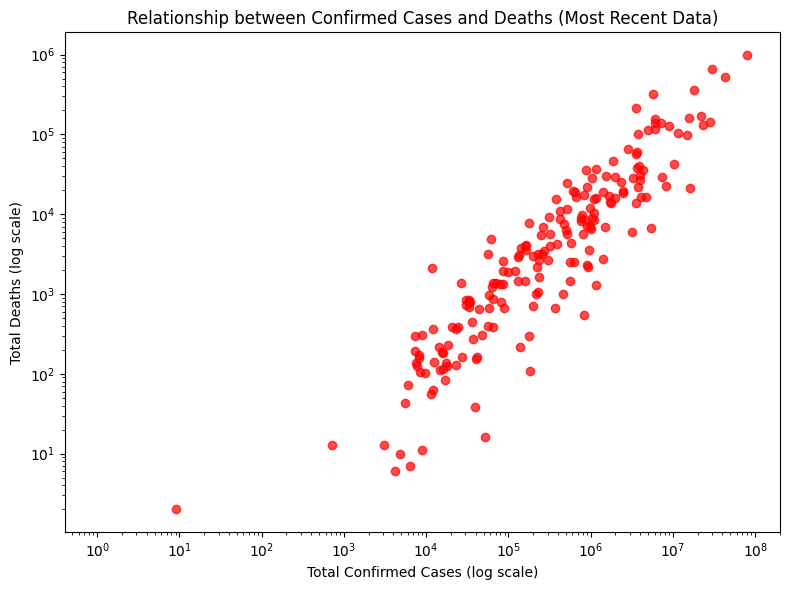

### ✍️ Insights from the Scatter Plot

The scatter plot shows the overall distribution and relationship between `total confirmed COVID-19 cases` and `total deaths` over the entire period. It demonstrates a clear **positive correlation**: as the number of confirmed cases increases, the number of deaths also tends to increase.

---

### ✍️ Overall Insights & Conclusion

1. **Regional and Global Differences in COVID-19 Spread:**  
   - The **line plot** shows that within the Levant region, **Palestine** experienced the highest spread, **Syria** the lowest, while **Jordan** and **Lebanon** exhibited similar trends, including noticeable infection waves, particularly in Palestine at the beginning of 2022.  
   - The **bar chart** illustrates global disparities, with the **United States** reporting the highest confirmed cases. Factors such as population density, country size, and demographic diversity may have contributed to differences in the ability to control the virus's spread.

2. **Positive Correlation between Cases and Deaths:**  
   - The **scatter plot** highlights a clear **positive correlation**: countries with higher numbers of confirmed cases generally report higher death counts, indicating the strong link between infection rates and fatalities.

**Conclusion:**  
Together, the three visualizations provide a comprehensive understanding of COVID-19 dynamics. They reveal significant **regional and global disparities**, emphasize the link between infection rates and mortality, and highlight the crucial role of **public health interventions** in mitigating the spread of the virus.

